In [1]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.feature_selection import SelectKBest, RFE, RFECV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Reading the Data

In [2]:
train_data = pd.read_parquet(r"D:\Analytixlabs\Internship\Project 4\Cyber Security\output\train_data.parquet")
test_data = pd.read_parquet(r"D:\Analytixlabs\Internship\Project 4\Cyber Security\output\test_data.parquet")

# Independent Varaibles and Target Variables

In [3]:
# Independent Variables
Xtrain = train_data.drop(columns = ['label','attack','attack_type']).copy()
Xtest = test_data.drop(columns = ['label','attack','attack_type']).copy()

# Dependent Variables
y_attack_train = train_data['attack'].copy()
y_label_train = train_data['label'].copy()
y_type_train = train_data['attack_type'].copy()

y_attack_test = test_data['attack'].copy()
y_label_test = test_data['label'].copy()
y_type_test = test_data['attack_type'].copy()

In [4]:
del train_data
del test_data

# **Machine Learning Pipeline**

### Model 1: Using MinMaxScaler

In [7]:
# Defining the ML Pipeline
pipeline1 = Pipeline(
    steps = [
        ('scaler', MinMaxScaler()),
        ('model', LogisticRegression(n_jobs = -1))
    ]
)

# Fitting to the Pipeline
pipeline1.fit(Xtrain, y_attack_train)

# Predicting the target
ytrain_pred1 = pipeline1.predict(Xtrain)
ytest_pred1 = pipeline1.predict(Xtest)

#Train Test Data Performance
print('Train Data Performance:')
print(metrics.classification_report(y_attack_train, ytrain_pred1))
print('Test Data Performance:')
print(metrics.classification_report(y_attack_test, ytest_pred1))

Train Data Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97   1467538
           1       0.86      0.81      0.83    298115

    accuracy                           0.95   1765653
   macro avg       0.91      0.89      0.90   1765653
weighted avg       0.94      0.95      0.94   1765653

Test Data Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    628946
           1       0.86      0.81      0.83    127763

    accuracy                           0.95    756709
   macro avg       0.91      0.89      0.90    756709
weighted avg       0.94      0.95      0.94    756709



In [10]:
ytest_proba1 = pipeline1.predict_proba(Xtest)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_attack_test, ytest_proba1)
auc_score1 = metrics.roc_auc_score(y_attack_test, ytest_proba1)

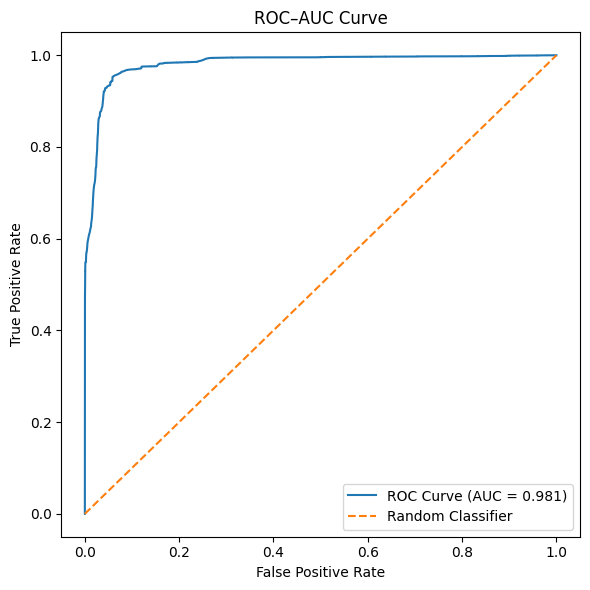

In [11]:
# ROC-AUC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, label = f"ROC Curve (AUC = {auc_score1:.3f})")
plt.plot([0, 1], [0, 1], linestyle = "--", label = "Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve")
plt.legend()
plt.tight_layout()
plt.show()

### Threshold Tuning

In [18]:
ytrain_proba1 = pipeline1.predict_proba(Xtrain)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_attack_train, ytrain_proba1)
j_scores1 = tpr1 - fpr1
best_threshold1 = thresholds1[np.argmax(j_scores1)]
best_threshold1

0.2735394948769747

In [20]:
y_pred = (ytrain_proba1 >= best_threshold1).astype(int)
print(metrics.confusion_matrix(y_attack_train, y_pred))
print(metrics.classification_report(y_attack_train, y_pred))

[[1380912   86626]
 [  13653  284462]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96   1467538
           1       0.77      0.95      0.85    298115

    accuracy                           0.94   1765653
   macro avg       0.88      0.95      0.91   1765653
weighted avg       0.95      0.94      0.95   1765653



In [22]:
precision1, recall1, thresholds1 = metrics.precision_recall_curve(y_attack_train, ytrain_proba1)
f1_scores1 = 2 * (precision1[:-1] * recall1[:-1]) / (precision1[:-1] + recall1[:-1])
best_idx1 = np.argmax(f1_scores1)
best_threshold1 = thresholds1[best_idx1]
best_threshold1

0.3101032231471762

In [23]:
y_pred = (ytrain_proba1 >= best_threshold1).astype(int)
print(metrics.confusion_matrix(y_attack_train, y_pred))
print(metrics.classification_report(y_attack_train, y_pred))

[[1408269   59269]
 [  23266  274849]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97   1467538
           1       0.82      0.92      0.87    298115

    accuracy                           0.95   1765653
   macro avg       0.90      0.94      0.92   1765653
weighted avg       0.96      0.95      0.95   1765653



# After Threshold Tuning for Max F1 Score, The Macro Avg = 0.92, Wighted Avg = 0.95

----------------------------
### Model 2: Using Standard Scaler

In [9]:
# Defining the ML Pipeline
pipeline2 = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(n_jobs = -1))
    ]
)

# Fitting to the Pipeline
pipeline2.fit(Xtrain, y_attack_train)

# Predicting the target
ytrain_pred2 = pipeline2.predict(Xtrain)
ytest_pred2 = pipeline2.predict(Xtest)

#Train Test Data Performance
print('Train Data Performance:')
print(metrics.classification_report(y_attack_train, ytrain_pred2))
print('Test Data Performance:')
print(metrics.classification_report(y_attack_test, ytest_pred2))

Train Data Performance:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97   1467538
           1       0.87      0.85      0.86    298115

    accuracy                           0.95   1765653
   macro avg       0.92      0.91      0.92   1765653
weighted avg       0.95      0.95      0.95   1765653

Test Data Performance:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    628946
           1       0.87      0.85      0.86    127763

    accuracy                           0.95    756709
   macro avg       0.92      0.91      0.92    756709
weighted avg       0.95      0.95      0.95    756709



### Using StandardScaler gives us a better result

In [24]:
ytest_proba2 = pipeline2.predict_proba(Xtest)[:,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_attack_test, ytest_proba2)
auc_score2 = metrics.roc_auc_score(y_attack_test, ytest_proba2)

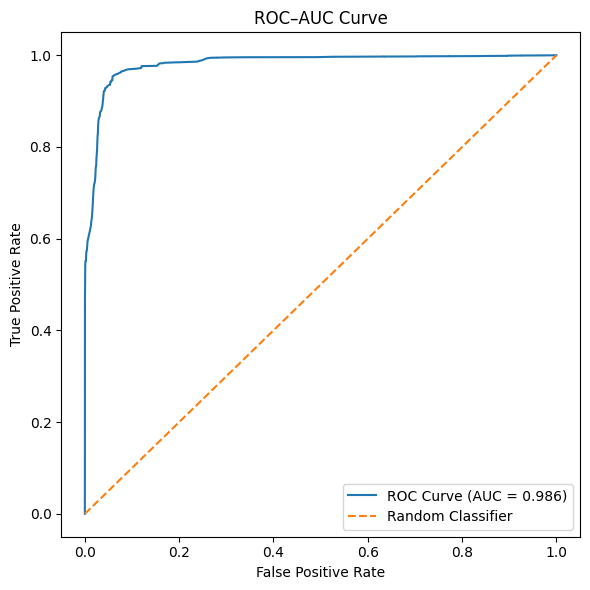

In [33]:
# ROC-AUC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr2, tpr2, label = f"ROC Curve (AUC = {auc_score2:.3f})")
plt.plot([0, 1], [0, 1], linestyle = "--", label = "Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
ytrain_proba2 = pipeline2.predict_proba(Xtrain)[:,1]
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_attack_train, ytrain_proba1)
j_scores2 = tpr2 - fpr2
best_threshold2 = thresholds2[np.argmax(j_scores2)]
best_threshold2

0.2735394948769747

In [27]:
y_pred = (ytrain_proba2 >= best_threshold2).astype(int)
print(metrics.confusion_matrix(y_attack_train, y_pred))
print(metrics.classification_report(y_attack_train, y_pred))

[[1381985   85553]
 [  10814  287301]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97   1467538
           1       0.77      0.96      0.86    298115

    accuracy                           0.95   1765653
   macro avg       0.88      0.95      0.91   1765653
weighted avg       0.95      0.95      0.95   1765653



In [28]:
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_attack_train, ytrain_proba2)
f1_scores2 = 2 * (precision2[:-1] * recall2[:-1]) / (precision2[:-1] + recall2[:-1])
best_idx2 = np.argmax(f1_scores2)
best_threshold2 = thresholds2[best_idx2]
best_threshold2

0.3070292687993234

In [29]:
y_pred = (ytrain_proba2 >= best_threshold2).astype(int)
print(metrics.confusion_matrix(y_attack_train, y_pred))
print(metrics.classification_report(y_attack_train, y_pred))

[[1415078   52460]
 [  19725  278390]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98   1467538
           1       0.84      0.93      0.89    298115

    accuracy                           0.96   1765653
   macro avg       0.91      0.95      0.93   1765653
weighted avg       0.96      0.96      0.96   1765653



---------------------------------
### Model 3: Using Balanced Model

In [30]:
# Defining the ML Pipeline
pipeline3 = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(n_jobs = -1, class_weight = 'balanced'))
    ]
)

# Fitting to the Pipeline
pipeline3.fit(Xtrain, y_attack_train)

# Predicting the target
ytrain_pred3 = pipeline3.predict(Xtrain)
ytest_pred3 = pipeline3.predict(Xtest)

#Train Test Data Performance
print('Train Data Performance:')
print(metrics.classification_report(y_attack_train, ytrain_pred3))
print('Test Data Performance:')
print(metrics.classification_report(y_attack_test, ytest_pred3))

Train Data Performance:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96   1467538
           1       0.74      0.97      0.84    298115

    accuracy                           0.94   1765653
   macro avg       0.86      0.95      0.90   1765653
weighted avg       0.95      0.94      0.94   1765653

Test Data Performance:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    628946
           1       0.74      0.97      0.84    127763

    accuracy                           0.94    756709
   macro avg       0.86      0.95      0.90    756709
weighted avg       0.95      0.94      0.94    756709



In [31]:
ytest_proba3 = pipeline3.predict_proba(Xtest)[:,1]
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_attack_test, ytest_proba3)
auc_score3 = metrics.roc_auc_score(y_attack_test, ytest_proba3)

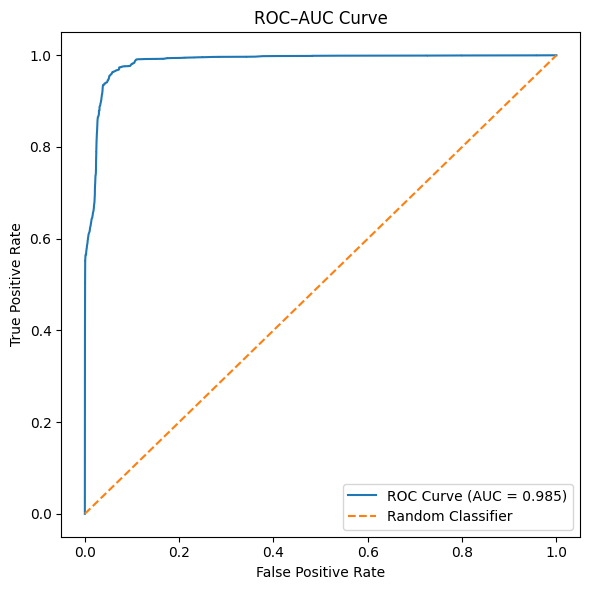

In [34]:
# ROC-AUC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr3, tpr3, label = f"ROC Curve (AUC = {auc_score3:.3f})")
plt.plot([0, 1], [0, 1], linestyle = "--", label = "Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve")
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
ytrain_proba3 = pipeline3.predict_proba(Xtrain)[:,1]
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_attack_train, ytrain_proba3)
j_scores3 = tpr3 - fpr3
best_threshold3 = thresholds3[np.argmax(j_scores3)]
best_threshold3

0.5905490951146114

In [36]:
y_pred = (ytrain_proba3 >= best_threshold3).astype(int)
print(metrics.confusion_matrix(y_attack_train, y_pred))
print(metrics.classification_report(y_attack_train, y_pred))

[[1381762   85776]
 [  10746  287369]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97   1467538
           1       0.77      0.96      0.86    298115

    accuracy                           0.95   1765653
   macro avg       0.88      0.95      0.91   1765653
weighted avg       0.95      0.95      0.95   1765653



In [37]:
precision3, recall3, thresholds3 = metrics.precision_recall_curve(y_attack_train, ytrain_proba3)
f1_scores3 = 2 * (precision3[:-1] * recall3[:-1]) / (precision3[:-1] + recall3[:-1])
best_idx3 = np.argmax(f1_scores3)
best_threshold3 = thresholds3[best_idx2]
best_threshold3

0.6529134631549582

In [38]:
y_pred = (ytrain_proba3 >= best_threshold3).astype(int)
print(metrics.confusion_matrix(y_attack_train, y_pred))
print(metrics.classification_report(y_attack_train, y_pred))

[[1412239   55299]
 [  22604  275511]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97   1467538
           1       0.83      0.92      0.88    298115

    accuracy                           0.96   1765653
   macro avg       0.91      0.94      0.92   1765653
weighted avg       0.96      0.96      0.96   1765653



-------------------
# Hyper Parameter Tuning

In [ ]:
# Declaring the Parameter Grid
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 20, 30],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
}

# Pipeline
pipeline4 = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(
            n_jobs = -1, 
            class_weight = 'balanced', 
            max_iter = 1000)
        )
    ]
)


# Setting up the Grid Search
grid_search = GridSearchCV(
    estimator = pipeline4,
    param_grid = param_grid,
    scoring = 'recall',
    cv = 5,
    n_jobs = -1,
    verbose = 1
)

# Fitting the grid
grid_search.fit(Xtrain, y_attack_train)

# Fitting to the best model
best_model = grid_search.best_estimator_

# Print the Parameters of the best model
print("Best Parameters:")
print(grid_search.best_params_)

# Predicting using best model
ytrain_pred4 = best_model.predict(Xtrain)
ytest_pred4 = best_model.predict(Xtest)

print("Train Data Performance:")
print(metrics.classification_report(y_attack_train, ytrain_pred4))

print("Test Data Performance:")
print(metrics.classification_report(y_attack_test, ytest_pred4))